# Orders Regresion Lineal`

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
orders = pd.read_csv("data/tablon_primario.csv")

In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,wait_time,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,number_of_products,vendedores_unicos,precio,transporte,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,8.436574,0.0,0,0,4,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,13.782037,0.0,0,0,4,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,9.394213,0.0,1,0,5,1,1,159.90,19.22,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,13.208750,0.0,1,0,5,1,1,45.00,27.20,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,2.873877,0.0,1,0,5,1,1,19.90,8.72,30.174037


<AxesSubplot:>

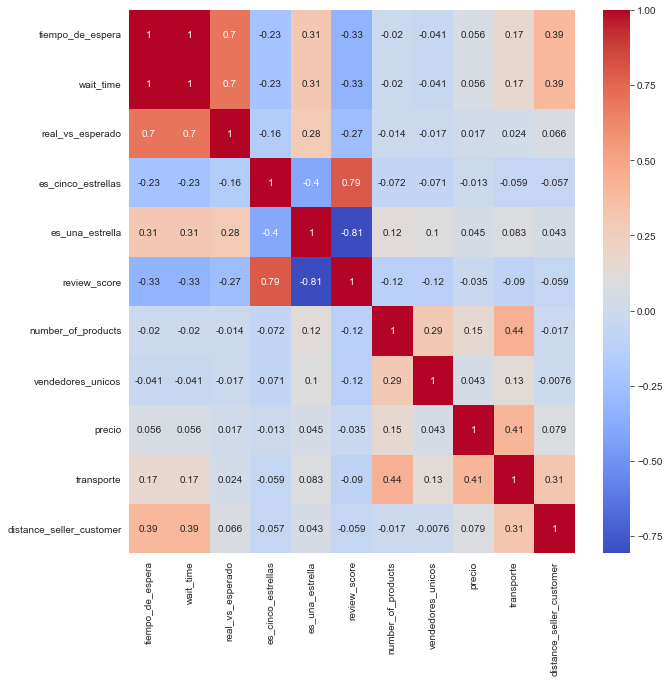

In [6]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    orders.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

## 1 - Univariate regression

***Model 1***:

In [7]:
import statsmodels.formula.api as smf

model1 = smf.ols('review_score ~ tiempo_de_espera', data=orders).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:27:33   Log-Likelihood:            -1.5441e+05
No. Observations:               95872   AIC:                         3.088e+05
Df Residuals:                   95870   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.7236      0.006  

***Model 2***:

In [8]:
import statsmodels.formula.api as smf

model2 = smf.ols('review_score ~ real_vs_esperado', data=orders).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7682.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:27:33   Log-Likelihood:            -1.5640e+05
No. Observations:               95880   AIC:                         3.128e+05
Df Residuals:                   95878   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2122      0.004  

## 2 - Multivariate regression

***Model 3***:

In [9]:
model3 = smf.ols('review_score ~ tiempo_de_espera + real_vs_esperado', data=orders).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6191.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:27:34   Log-Likelihood:            -1.5426e+05
No. Observations:               95872   AIC:                         3.085e+05
Df Residuals:                   95869   BIC:                         3.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6502      0.008  

- Manteniendo constante `tiempo_de_espera`, cada día adicional de `real_vs_esperado` reduce el review_score en promedio en 0.0205 [0.023 - 0.018] puntos
- Manteniendo `real_vs_esperado` constante, cada día adicional de `tiempo_de_espera` reduce el review_score en promedio en 0.0383 [0.039 - 0.037] puntos

Contrariamente a lo que se encontró con el análisis de correlación bivariante simple, ¡'retraso' tiene menos impacto que 'tiempo_espera' en la reducción de 'review_score'! Este interesante hallazgo demuestra la importancia de la regresión multivariante para eliminar el impacto potencial de los factores de confusión.

---
❌ R-squared es bastante bajo: no más del 12 % de las variaciones de review_score se explican por las variaciones combinadas de `wait_time` y `delay_vs_expected`.

✅ Intentemos agregar más características a nuestra regresión para mejorar la explicabilidad de la regresión lineal.

👉 Cree un nuevo OLS `model4` con más características del conjunto de datos `orders`.
- ⚠️ No cree **fugas de datos**: no agregue funciones que se deriven directamente de `review_score`
- ⚠️ No agregue dos características perfectamente colineales entre sí
- ⚖️ Transforme cada característica $X_i$ en su respectivo puntaje z $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ para comparar los coeficientes de regresión parcial $\beta_i$ juntos. De lo contrario, $\beta_i$ no estará en la misma dimensión, lo que significa que comparará manzanas (por ejemplo, "review_stars por día") con naranjas (por ejemplo, "review_stars per BRL").

📝 <u>Nota</u>: una **`Regresión lineal multivariada`** también se denomina método de **`Mínimos cuadrados ordinarios`** porque en este modelo queremos minimizar el **`MSE medio cuadrático Errores`**

***Model 4***:

In [10]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'tiempo_de_espera', 'wait_time', 'real_vs_esperado',
       'es_cinco_estrellas', 'es_una_estrella', 'review_score',
       'number_of_products', 'vendedores_unicos', 'precio', 'transporte',
       'distance_seller_customer'],
      dtype='object')

In [11]:
features = [
    "tiempo_de_espera",
    "real_vs_esperado",
    "number_of_products",
    "vendedores_unicos",
    "precio",
    "transporte",
    "distance_seller_customer",
]

In [12]:
formula = "review_score ~ " + ' + '.join(features)


In [13]:
model4a = smf.ols(formula = formula, data = orders).fit()
print(model4a.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2322.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:27:35   Log-Likelihood:            -1.5258e+05
No. Observations:               95872   AIC:                         3.052e+05
Df Residuals:                   95864   BIC:                         3.052e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [14]:
orders_standardized = orders.copy()
for f in features:
    mu = orders[f].mean()
    sigma = orders[f].std()
    orders_standardized[f] = orders[f].map(lambda x: (x - mu) / sigma)
orders_standardized

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,wait_time,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,number_of_products,vendedores_unicos,precio,transporte,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-0.431192,8.436574,-0.161774,0,0,4,-0.264583,-0.11254,-0.513828,-0.652036,-0.979449
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0.134174,13.782037,-0.161774,0,0,4,-0.264583,-0.11254,-0.086651,0.000493,0.429798
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-0.329907,9.394213,-0.161774,1,0,5,-0.264583,-0.11254,0.111745,-0.164034,-0.145452
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.073540,13.208750,-0.161774,1,0,5,-0.264583,-0.11254,-0.441549,0.206848,2.054711
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-1.019535,2.873877,-0.161774,1,0,5,-0.264583,-0.11254,-0.562416,-0.652036,-0.959089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,-0.454309,8.218009,-0.161774,1,0,5,-0.264583,-0.11254,-0.311532,-0.449399,-0.893005
95876,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.023841,22.193727,-0.161774,0,0,4,-0.264583,-0.11254,0.183976,-0.123135,-0.212755
95877,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.305780,24.859421,-0.161774,1,0,5,-0.264583,-0.11254,0.333688,1.964585,0.617689
95878,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.483664,17.086424,-0.161774,0,0,2,1.601690,-0.11254,1.075217,2.715644,-0.387520


👉 Create your `model4` and train it.

In [15]:
formula = "review_score ~ " + ' + '.join(features)
formula

'review_score ~ tiempo_de_espera + real_vs_esperado + number_of_products + vendedores_unicos + precio + transporte + distance_seller_customer'

In [16]:
model4 = smf.ols(formula = formula, data = orders_standardized).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2322.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:27:36   Log-Likelihood:            -1.5258e+05
No. Observations:               95872   AIC:                         3.052e+05
Df Residuals:                   95864   BIC:                         3.052e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

<AxesSubplot:>

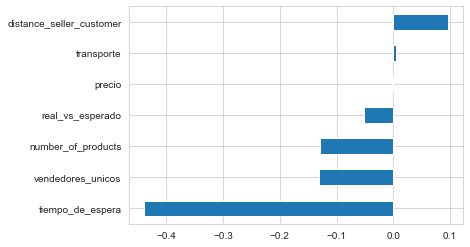

In [17]:
model4.params[1:].sort_values().plot(kind='barh')

## 3 - Check model performance

In [18]:
predicted_review_score = model4.predict(orders_standardized[features])
residuals = predicted_review_score - orders_standardized.review_score

In [27]:
residuals

0        0.306541
1        0.195774
2       -0.657075
3       -0.618482
4       -0.432627
           ...   
95875   -0.674654
95876   -0.258924
95877   -1.294034
95878    1.729257
95879   -0.556826
Length: 95880, dtype: float64

In [19]:
rmse = (residuals**2).mean()**0.5
rmse

1.188315411682106

Text(0.5, 1.0, 'residuals density plot')

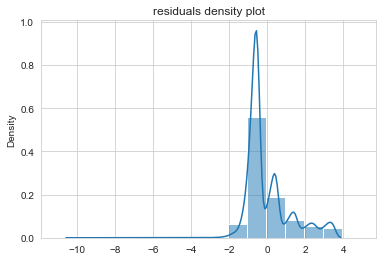

In [20]:
sns.histplot(residuals, kde=True, stat='density', discrete=True)
plt.title('residuals density plot')

Text(0.5, 1.0, 'distribution of predicted and actual values')

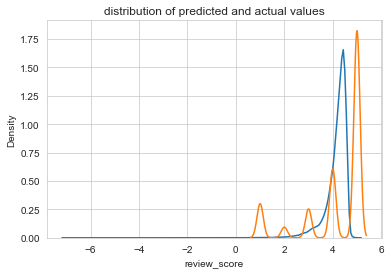

In [21]:
sns.kdeplot(predicted_review_score, label='predicted review score')
sns.kdeplot(orders.review_score, label = 'actual review score')
plt.title('distribution of predicted and actual values')

In [22]:
from metricas_lineal import RMSLE
from metricas_lineal import MAPE
from metricas_lineal import MAE


In [23]:
errorrmse = RMSLE(orders_standardized.review_score,predicted_review_score)
errorrmse

C:\Users\jduque\Anaconda3\envs\UCEMA\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.3146702038277388

In [24]:
MAPE(orders_standardized.review_score,predicted_review_score)

0.4233140597027851

In [25]:
MAE(orders_standardized.review_score,predicted_review_score)

0.9145208986155958